<a href="https://colab.research.google.com/github/JaoSaraiva/-Engenhando-com-Dados/blob/main/deep_learn_engjao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#carregando o dataset
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
#explorando os dados
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

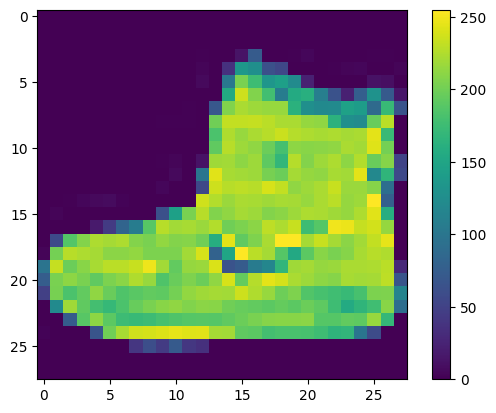

In [4]:
#exibindo os dados
total_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']
'''
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

for imagem in range(10):
    plt.subplot(2, 5, imagem+1)
    plt.imshow(imagens_treino[imagem])
    plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])
    plt.subplots_adjust(hspace=0.2, wspace=0.5)
'''
plt.imshow(imagens_treino[0])
plt.colorbar()

In [5]:
#processo de Normalização
imagens_treino = imagens_treino/float(255)

In [6]:
#modelo sequencia
   #entrada (camada 0)
   #processamento (camada 1)
   #saida (camada 2)

modelo = keras.Sequential([
    #rede neural:
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu), #este número 256 é aleatório e deve ser múltiplo de 2. Eles são responsáveis pelas comunicações profundas entre as camadas da rede neural. 'nn' é tradução de redes neurais
    keras.layers.Dropout(0.2), #deixando 20% adormecido (técnica para melhorar nossas validações)
    #keras.layers.Dense(128, activation = tensorflow.nn.relu),
    #keras.layers.Dense(64, activation = tensorflow.nn.relu),
    keras.layers.Dense(10, activation = tensorflow.nn.softmax) #10 é o número de classificações que temos
])

Finalizamos a criação do nosso modelo. Nosso modelo de deep learning possui várias camadas(multilayers). Agora vamos treiná-lo. Mas, antes precisamos compilar.

In [7]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2) #substituímos o 5 por 30. Vimos que a melhor opção é a 5.

Epoch 1/5
1500/1500 [==============================] - 17s 10ms/step - loss: 0.5285 - accuracy: 0.8137 - val_loss: 0.3971 - val_accuracy: 0.8598
Epoch 2/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.3984 - accuracy: 0.8555 - val_loss: 0.3681 - val_accuracy: 0.8645
Epoch 3/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3649 - accuracy: 0.8673 - val_loss: 0.3532 - val_accuracy: 0.8677
Epoch 4/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3408 - accuracy: 0.8733 - val_loss: 0.3439 - val_accuracy: 0.8773
Epoch 5/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3217 - accuracy: 0.8802 - val_loss: 0.3261 - val_accuracy: 0.8830


Nesta saída observamos que tivemos bastante perdas (loss: 12.2693). Vamos tentar diminuir ao máximo essas perdas. Observamos que para melhorar as perdas, podemos deixar as cores menos variáveis, afinal, temos uma escala de mais ou menos 0 a 255 cores e queremos reduzir para 0 a 1. Para isso vamos fazer alterações nas nossas linhas de código assima: 'imagens_treino = imagens_treino/float(255)'.
Após rodar o código observamos que nossa perda reduziu drasticamente para 0.4799.

Agora vamos tentar mais melhoramentos do nosso modelo. Afunilando as camadas densas. Temos 256 para 10. Vamos voltar ao código e acrescentar mais uma camada para executação do nosso propósito. Após adicionarmos mais camadas, vimos que para este modelo não é o ideal pois está aumentando as perdas. Então, vamos continuar da forma que está.

Agora vamos treinar nosso modelo mais vezes para melhorar ainda mais essas perdas: 'epochs=5'. Observamos que melhorando ainda mais nosso modelo com uma perda de apenas 0.2674!

Após vermos e analisarmos nossas perdas, vamos verificar o quanto o modelo está ganhando/acertando: 'metrics=['accuracy']'. Observamos que nossa acurácia está em ascensão, então estamos indo bem com nosso modelo.

Após esse treinamento no modelo (modelo.fit), vamos fazer a predição ou testes e vamos verificar como ele está se adaptando à dados novos (modelo.predict).

In [8]:
#resumo do modelo
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
#salvando modelo após treinado e validado. Vai ser salvo em htf5(h5)
from tensorflow.keras.models import load_model

modelo.save('modelo_epochs5_nos3.h5')
modelo_salvo = load_model('modelo_epochs5_nos3.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
testes = modelo.predict(imagens_teste)
#testes[0]
print('Resultado de teste:', np.argmax(testes[0]))
print('Número da imagem de teste:', identificacoes_teste[0])

#Após salvar o modelo, vamos carregar aqui para usarmos. Com a saída que vamos obter verificamos que otimizamos, salvamos e que está tudo certo com nosso modelo.
testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('Resultado de teste modelo salvo:', np.argmax(testes_modelo_salvo[0]))
print('Número da imagem de teste:', identificacoes_teste[0])

313/313 [==============================] - 1s 2ms/step
Resultado de teste: 9
Número da imagem de teste: 9
313/313 [==============================] - 1s 2ms/step
Resultado de teste modelo salvo: 9
Número da imagem de teste: 9


Para saber o resultado deste teste (ou saber se acertamos ou erramos) temos que pegar o maior número 'np.argmax(testes[0])'. Acima vimos que ele está com bastante acertividade. Mudamos os números entre colchetes e obtivemos os mesmo resultados de teste e real.

Mas, ele pode errar, então, vamos verificar quantas vezes ele acertou e quantas vezes ele errou (ou quanto teve de acurácia ou perdeu):

In [11]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda de teste:', perda_teste)
print('Acurácia de teste:', acuracia_teste)

313/313 [==============================] - 1s 3ms/step - loss: 51.5731 - accuracy: 0.8619
Perda de teste: 51.5731086730957
Acurácia de teste: 0.8618999719619751


Observamos que nossa perda e acurácia estão péssimas. Então, precisamos fazer ajustes no nosso modelo. Vamos ajustar passando dados de validação (assegurar os novos dados que entram), pois até agora só asseguramos dados de treino e teste e assim tentar reduzir esse status ruim que obtivemos. Vamos deixar 20% de validação la no fit: 'validation_split=0.2'.
Após rodar a célula, vimos que nosso output veio com mais informações, as val_loss e val_accuracy. Para entendermos essas informações, vamos passar para um gráfico. Desta forma vamos salvar o nosso modelo.fit em uma variável chamada historico.

In [12]:
historico.history
#na saída observamos que entrega um dicionário com os valores das 5 épocas. Então vamos visualizar como nosso modelo tá indo
#nos dados de treino e validação através de gráfico para melhor compreensão.

{'loss': [0.5284854173660278,
  0.39838656783103943,
  0.3649318516254425,
  0.3408060371875763,
  0.32167166471481323],
 'accuracy': [0.8136666417121887,
  0.8554999828338623,
  0.867312490940094,
  0.8733333349227905,
  0.8801875114440918],
 'val_loss': [0.3971388041973114,
  0.3680533170700073,
  0.3532385230064392,
  0.3439139425754547,
  0.3260544538497925],
 'val_accuracy': [0.8598333597183228,
  0.8644999861717224,
  0.8676666617393494,
  0.8773333430290222,
  0.8830000162124634]}

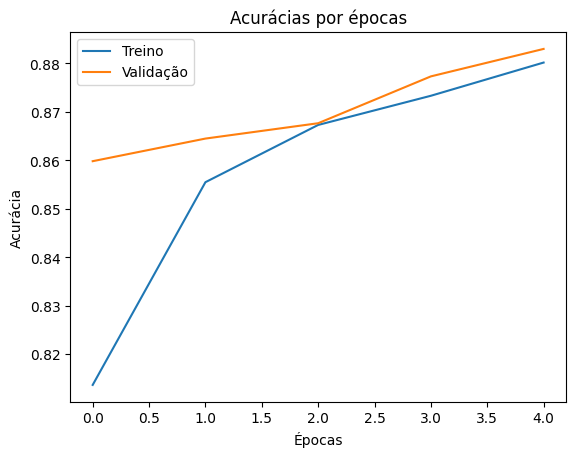

In [13]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácias por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

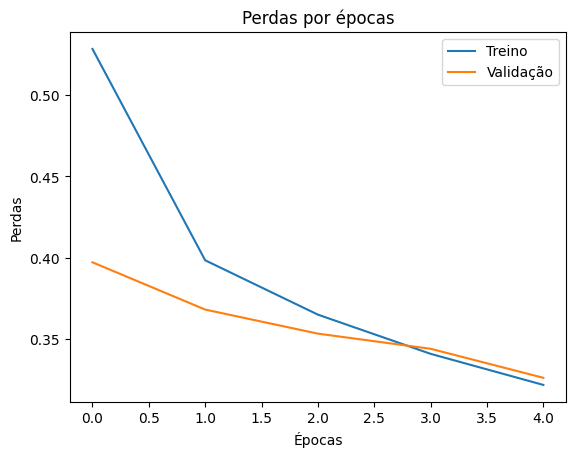

In [14]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas por épocas')
plt.xlabel('Épocas')
plt.ylabel('Perdas')
plt.legend(['Treino', 'Validação'])

Com essas saídas de gráficos conseguimos entender que a nossa rede precisa fazer um ajuste no treinamento. Ela está servindo tão pouco para o treino que ela está underfit(está encaixando pouco) nos dados de treino então ela precisa aprender o bastante para entender dados novos de validação. Então precisamos decidir o quanto a gente treina nossa rede.
Observando os gráficos vimos que as quebras ocorreram a partir da época 10 em ambos os gráficos. Então vamos treinar nossa rede por mais 5 vezes = 10.
Ao final da análise vimos que a melhor opção é manter as épocas 5 vezes.

Mas, precisamos de outra técnica para melhorar nosso modelo, pois, ele continua com as validações ruins.
A técnica consiste em deixar alguns neurônios ''dormentes''lá nas nossas camadas vamos acrescentar os dropout.
Após usarmos a técnica do dropout, obtivemos um retorno bem mais satisfatório que pode ser visualizado nos nossos gráficos acima.
Então, podemos concluir que nosso modelo está funcionando bem. Próximo passo é salvá-lo.